<a href="https://colab.research.google.com/github/akshay-chauhan-1810/SQL-Database-Creation-Project/blob/main/project_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import random

from glob import glob
import librosa.display
import librosa
import os
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# # Download the train-clean-100 subset (approx 6GB)
# LIBRISPEECH_URL = "https://www.openslr.org/resources/12/train-clean-100.tar.gz"
# !wget {LIBRISPEECH_URL}

--2025-06-27 13:07:15--  https://www.openslr.org/resources/12/train-clean-100.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://openslr.elda.org/resources/12/train-clean-100.tar.gz [following]
--2025-06-27 13:07:16--  https://openslr.elda.org/resources/12/train-clean-100.tar.gz
Resolving openslr.elda.org (openslr.elda.org)... 141.94.109.138, 2001:41d0:203:ad8a::
Connecting to openslr.elda.org (openslr.elda.org)|141.94.109.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387309499 (5.9G) [application/x-gzip]
Saving to: ‘train-clean-100.tar.gz’

train-clean-100.tar 100%[===================>]   5.95G  32.9MB/s    in 3m 15s  

2025-06-27 13:10:32 (31.2 MB/s) - ‘train-clean-100.tar.gz’ saved [6387309499/6387309499]



In [3]:
  # Extract the files (this may take several minutes)
with tarfile.open('/content/drive/MyDrive/train-clean-100.tar.gz', 'r:gz') as tar:
    tar.extractall()

In [3]:
# Verify the download structure
# !ls LibriSpeech/train-clean-100/
print("\nNumber of speaker directories:", len(os.listdir("/content/LibriSpeech/train-clean-100/")))


Number of speaker directories: 251


In [4]:
# make searchable path for audio using glob
audio_files = glob('/content/LibriSpeech/train-clean-100/*/*/*.flac')

In [5]:
# Count number of total audio files
total_audiofile = len(audio_files)
print(f'Total number of audio files: {total_audiofile}')

Total number of audio files: 28539


In [6]:
# Group by speaker ID
speaker_data = {}
for audio_file in audio_files:
    # Get the filename from the full path
    filename = os.path.basename(audio_file)
    # Remove the extension and split the filename
    parts = os.path.splitext(filename)[0].split('-')
    speaker_id = parts[0]
    if speaker_id not in speaker_data:
        speaker_data[speaker_id] = []
    speaker_data[speaker_id].append(str(audio_file))

In [7]:
# Filter speakers with sufficient utterances
min_utterances = 5
speaker_data = {spk: files for spk, files in speaker_data.items() if len(files) >= min_utterances}
print(f"Loaded {len(speaker_data)} speakers with at least {min_utterances} utterances")

Loaded 251 speakers with at least 5 utterances


In [8]:
# 2. Create verification pairs
print("Creating 200 verification pairs...")
pairs_data = []
speakers = list(speaker_data.keys())

ratio = 0.5

# Same speaker pairs
num_same = int(200 * ratio)
for _ in range(num_same):
    speaker = random.choice([s for s in speakers if len(speaker_data[s]) >= 2])
    audio1, audio2 = random.sample(speaker_data[speaker], 2)
    pairs_data.append({
        'audio_path_1': audio1,
        'audio_path_2': audio2,
        'speaker_1': speaker,
        'speaker_2': speaker,
        'label': 1
    })


# Different speaker pairs
num_diff = 200 - num_same
for _ in range(num_diff):
    speaker1, speaker2 = random.sample(speakers, 2)
    audio1 = random.choice(speaker_data[speaker1])
    audio2 = random.choice(speaker_data[speaker2])
    pairs_data.append({
        'audio_path_1': audio1,
        'audio_path_2': audio2,
        'speaker_1': speaker1,
        'speaker_2': speaker2,
        'label': 0
    })

Creating 200 verification pairs...


In [9]:
df = pd.DataFrame(pairs_data)

# saving the dataframe
df.to_csv('audio.csv', index=False)

In [10]:
# Shuffle and create DataFrame
random.shuffle(pairs_data)
df = pd.DataFrame(pairs_data)
print(f"Created {len(df)} pairs ({num_same} same, {num_diff} different)")

Created 200 pairs (100 same, 100 different)


In [16]:
df.head()

,audio_path_1,audio_path_2,speaker_1,speaker_2,label
0,/content/LibriSpeech/train-clean-100/5688/4123...,/content/LibriSpeech/train-clean-100/4481/1749...,5688,4481,0
1,/content/LibriSpeech/train-clean-100/8123/2752...,/content/LibriSpeech/train-clean-100/8123/2752...,8123,8123,1
2,/content/LibriSpeech/train-clean-100/831/13074...,/content/LibriSpeech/train-clean-100/8324/2866...,831,8324,0
3,/content/LibriSpeech/train-clean-100/3699/1759...,/content/LibriSpeech/train-clean-100/3699/1940...,3699,3699,1
4,/content/LibriSpeech/train-clean-100/5022/2940...,/content/LibriSpeech/train-clean-100/5022/2940...,5022,5022,1


In [19]:
df['label'].value_counts()

,count
label,
0,100
1,100


In [20]:
# Play one audio file from dataframe
ipd.Audio(df['audio_path_1'].iloc[0])

In [21]:
df.isna().sum()

,0
audio_path_1,0
audio_path_2,0
speaker_1,0
speaker_2,0
label,0


In [15]:
samples, sample_rate = librosa.load(df['audio_path_1'].iloc[0])
print(f'samples: {samples[:50]}')
# print(f'anotehr samples: {samples[30000:30050]}')
print(f'shape of samples: {samples.shape}')
print(f'sample_rate: {sample_rate}')

samples: [0.00315985 0.00357968 0.00308123 0.00331632 0.00332698 0.0030335
 0.00316402 0.00309345 0.00286546 0.00292457 0.00283666 0.00265666
 0.00267742 0.0026394  0.00251202 0.00234251 0.00213634 0.00209434
 0.00207897 0.00202117 0.00214364 0.0021753  0.00202125 0.00206035
 0.00207995 0.00195157 0.0021657  0.00255498 0.00265485 0.00277198
 0.00306788 0.00318132 0.00320612 0.0034774  0.00377446 0.00380587
 0.00378898 0.00391042 0.00400137 0.00397176 0.00384051 0.00359674
 0.00336711 0.00324012 0.00317274 0.00319044 0.0032     0.00308886
 0.00302531 0.00303071]
shape of samples: (344642,)
sample_rate: 22050


In [16]:
# Find the exact lenght of audio
len(samples)/sample_rate

15.630022675736962

In [18]:
# Audio Waveform
# time = np.linspace(0, len(samples)/sample_rate, len(samples))
# plt.plot(time, samples)
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Audio Waveform')
# plt.show()

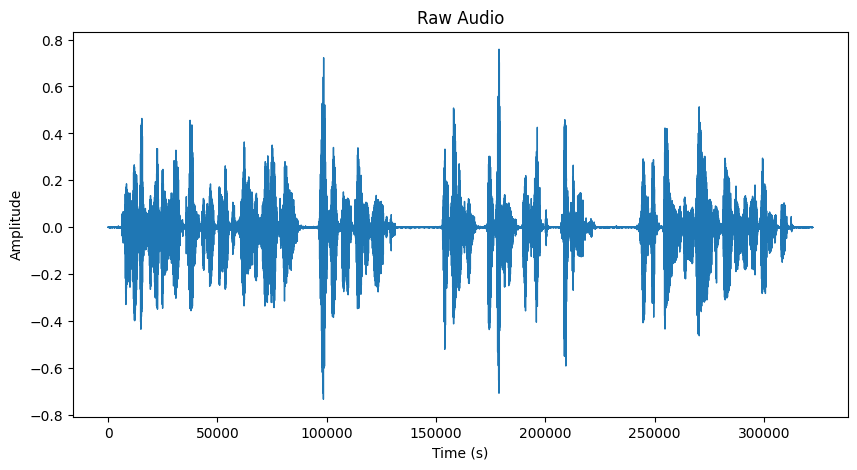

In [19]:
# Raw Audio
pd.Series(samples).plot(figsize=(10, 5),
                        lw=1,
                        title='Raw Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

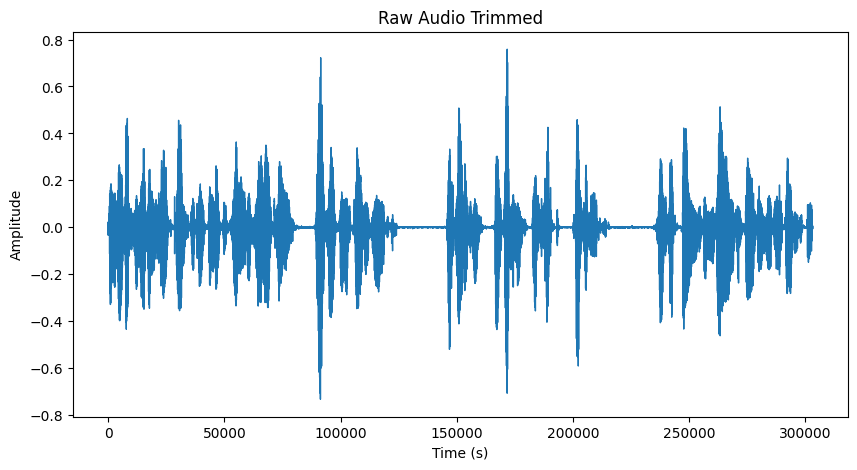

In [20]:
# Trimming leading/lagging silence
samples_trimmed, _ = librosa.effects.trim(samples, top_db=20)
pd.Series(samples_trimmed).plot(figsize=(10, 5),
                                lw=1,
                                title='Raw Audio Trimmed')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

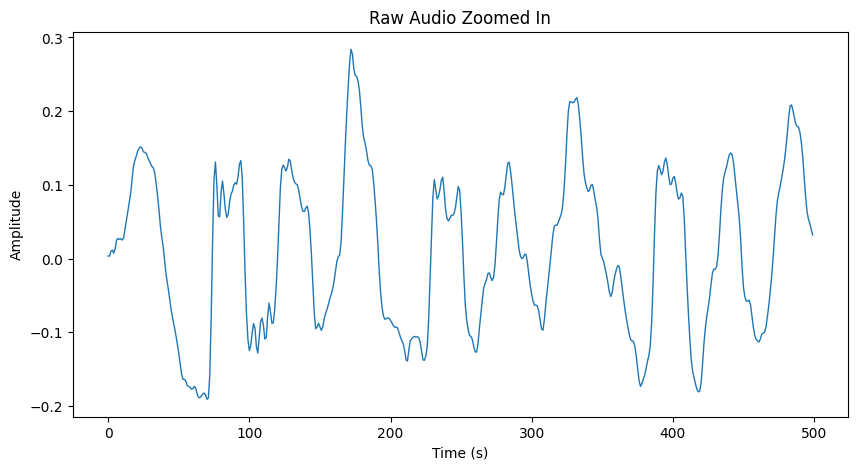

In [21]:
# Raw Audio Zoomed in
pd.Series(samples[30000:30500]).plot(figsize=(10, 5),
                                     lw=1,
                                     title='Raw Audio Zoomed In')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [22]:
# Collect all transcript files
transcript_files = glob(os.path.join('/content/LibriSpeech/train-clean-100', '*/*/*.trans.txt'))
print(transcript_files[0])

/content/LibriSpeech/train-clean-100/4853/27670/4853-27670.trans.txt


In [23]:
# Created dataframe with transcript of auido file
data = []
for file in transcript_files:
    with open(file, 'r') as f:
        for line in f:
            parts = line.strip().split(' ', 1)
            file_id = parts[0]
            transcript = parts[1]
            speaker_id = file.split('/')[-3]
            chapter_id = file.split('/')[-2]
            flac_path = os.path.join(os.path.dirname(file), f"{file_id}.flac")
            data.append((file_id, speaker_id, chapter_id, flac_path, transcript))

df_sample = pd.DataFrame(data, columns=['file_id', 'speaker_id', 'chapter_id', 'flac_path', 'transcript'])

In [24]:
# df_sample.head()

In [22]:
def extract_metadata(path):
  parts = path.split('/')
  return {
      'speaker_id': parts[-3],
      'chapter_id': parts[-2],
      'utterance_id': parts[-1].split('.')[0].split('-')[-1],
      'transcript' : parts[1],
      'path': path
  }

metadata = [extract_metadata(path) for path in audio_files]
metadata_df = pd.DataFrame(metadata)

# Convert ID to numeric
metadata_df['speaker_id'] = pd.to_numeric(metadata_df['speaker_id'])
metadata_df['chapter_id'] = pd.to_numeric(metadata_df['chapter_id'])
metadata_df['utterance_id'] = pd.to_numeric(metadata_df['utterance_id'])


In [23]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28539 entries, 0 to 28538
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   speaker_id    28539 non-null  int64 
 1   chapter_id    28539 non-null  int64 
 2   utterance_id  28539 non-null  int64 
 3   transcript    28539 non-null  object
 4   path          28539 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [24]:
metadata_df.isna().sum()

,0
speaker_id,0
chapter_id,0
utterance_id,0
transcript,0
path,0


In [25]:
metadata_df.head()

,speaker_id,chapter_id,utterance_id,transcript,path
0,4853,27670,27,content,/content/LibriSpeech/train-clean-100/4853/2767...
1,4853,27670,16,content,/content/LibriSpeech/train-clean-100/4853/2767...
2,4853,27670,7,content,/content/LibriSpeech/train-clean-100/4853/2767...
3,4853,27670,24,content,/content/LibriSpeech/train-clean-100/4853/2767...
4,4853,27670,2,content,/content/LibriSpeech/train-clean-100/4853/2767...


In [ ]:
metadata_df.describe()

,speaker_id,chapter_id,utterance_id
count,28539.000000,28539.000000,28539.000000
mean,3807.547216,116990.727776,29.114860
std,2780.342240,82998.820066,23.198393
min,19.000000,198.000000,0.000000
25%,1116.000000,41615.000000,12.000000
50%,3664.000000,123523.000000,24.000000
75%,6181.000000,152139.000000,40.000000
max,8975.000000,305213.000000,132.000000


## **Speaker Distribution**

Number of unique speakers: 251


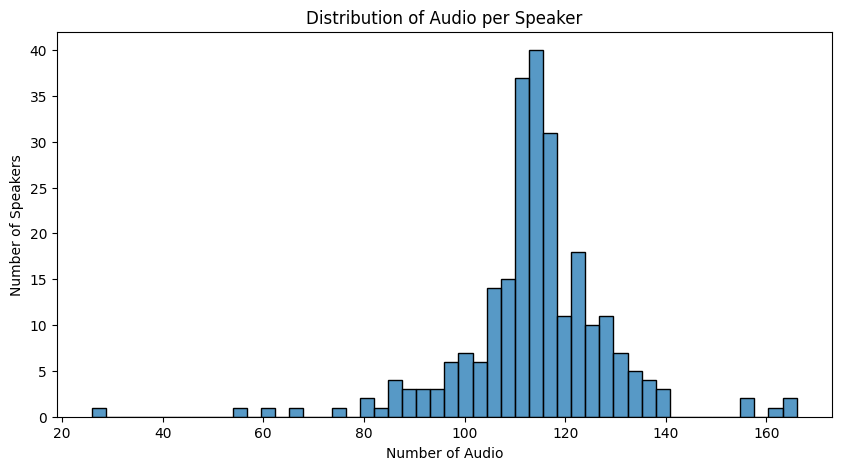

In [ ]:
# Number of unique speakers
num_speakers = metadata_df['speaker_id'].nunique()
print(f'Number of unique speakers: {num_speakers}')

# Distribution of audio per speaker id
audio_per_speaker = metadata_df['speaker_id'].value_counts()
# print(audio_per_speaker)

plt.figure(figsize=(10, 5))
sns.histplot(audio_per_speaker, bins=50)
plt.title('Distribution of Audio per Speaker')
plt.xlabel('Number of Audio')
plt.ylabel('Number of Speakers')
plt.show()

## **Audio** **Duration** **Analysis**

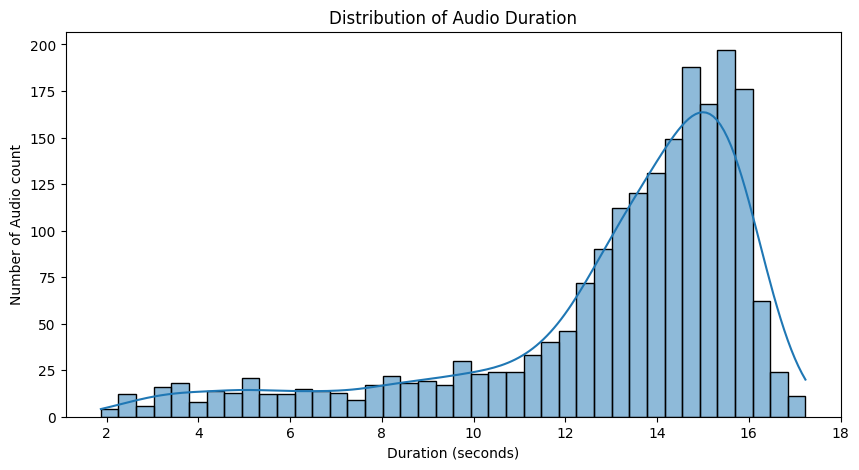

In [ ]:
duration = []
# Sample first 500 files to get duration
for f in audio_files[:2000]:
  y, sr = librosa.load(f, sr=None)
  duration.append(len(y)/sr)

plt.figure(figsize=(10, 5))
sns.histplot(duration, bins=40, kde=True)
plt.title('Distribution of Audio Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Audio count')
plt.show()

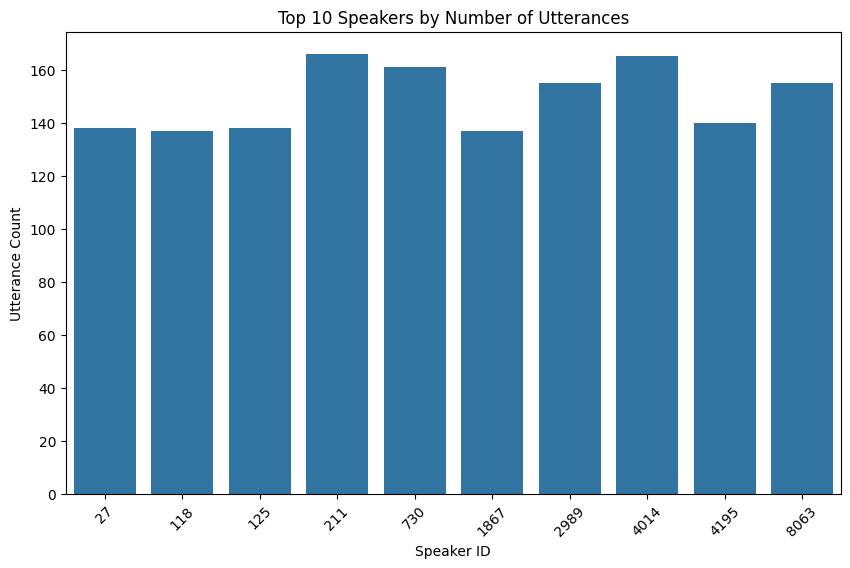

In [ ]:
# Plot Top 10 Speakers by Utterance Count
top_speakers = metadata_df['speaker_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_speakers.index, y=top_speakers.values)
plt.title("Top 10 Speakers by Number of Utterances")
plt.xlabel("Speaker ID")
plt.ylabel("Utterance Count")
plt.xticks(rotation=45)
plt.show()

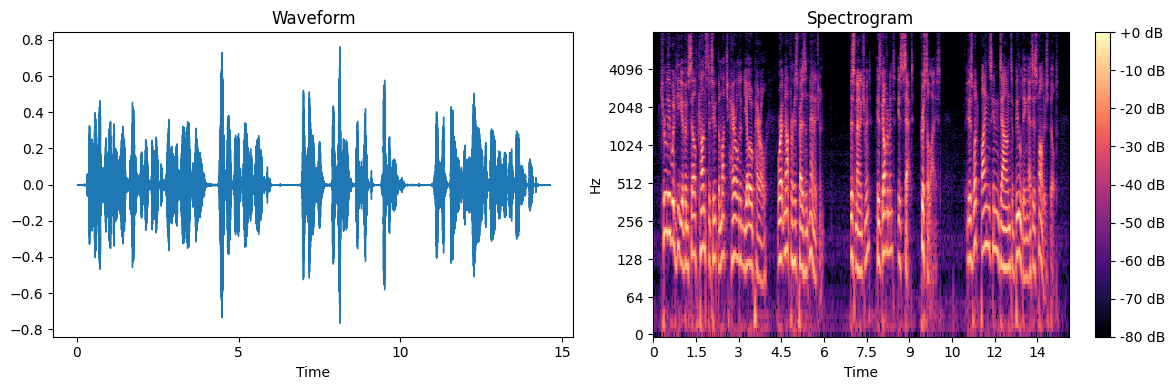

In [31]:
# Waveform and Spectrogram Visualization

# path = '/content/LibriSpeech/train-clean-100/*/*/*.flac'

def plot_waveform_spectrogram(path):
    y, sr = librosa.load(path, sr=None)
    plt.figure(figsize=(12, 4))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")


    # Spectrogram
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")

    plt.tight_layout()
    plt.show()

# Visualize one sample
# plot_waveform_spectrogram(df_sample['flac_path'].iloc[0])
# plot_waveform_spectrogram(audio_files[0])
plot_waveform_spectrogram(df['audio_path_1'].loc[0])


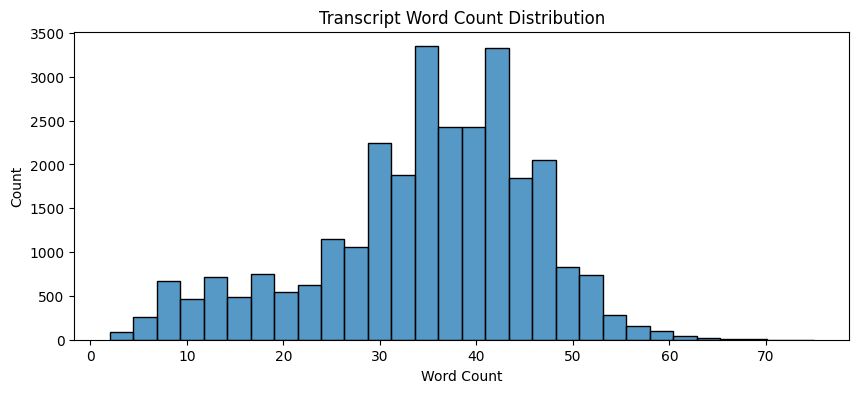

In [ ]:
# Transcript Analysis
df_sample['word_count'] = df_sample['transcript'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 4))
sns.histplot(df_sample['word_count'], bins=30)
plt.title('Transcript Word Count Distribution')
plt.xlabel('Word Count')
plt.show()

In [28]:
X_svm = df.iloc[:, :-3]
y = df['label']

In [29]:
print(X_svm.shape)
print(y.shape)

(200, 2)
(200,)


In [47]:
# Using SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Convert pairs to feature differences
X = []
for index, pair in df.iterrows():
    # Now 'pair' is a Pandas Series representing the row
    emb1 = extract_features(pair['audio_path_1'])
    emb2 = extract_features(pair['audio_path_2'])
    X.append(np.abs(emb1 - emb2))  # Absolute difference

    similarity = cosine_similarity([emb1], [emb2])[0][0]
    print(f"Similarity between {pair['audio_path_1']} and {pair['audio_path_2']}: {similarity}")

X = pd.DataFrame(X)

[ 8.2397461e-04  7.0190430e-04  4.2724609e-04 ... -3.0517578e-05
 -6.1035156e-05  6.1035156e-05] 16000
[-0.00024414 -0.00012207 -0.00018311 ...  0.00064087  0.00067139
  0.00042725] 16000
Similarity between /content/LibriSpeech/train-clean-100/8797/294123/8797-294123-0047.flac and /content/LibriSpeech/train-clean-100/118/47824/118-47824-0064.flac: 0.9949420094490051
[-3.0517578e-05 -1.5258789e-04 -1.8310547e-04 ...  6.1035156e-05
  1.6174316e-03  1.0375977e-03] 16000
[ 1.3732910e-03  6.1035156e-04 -6.1035156e-05 ... -6.7138672e-04
 -3.9672852e-04  3.0517578e-04] 16000
Similarity between /content/LibriSpeech/train-clean-100/1743/142914/1743-142914-0010.flac and /content/LibriSpeech/train-clean-100/1743/142913/1743-142913-0015.flac: 0.9849877953529358
[-1.1901855e-03  3.0517578e-05  7.3242188e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] 16000
[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] 16000
Similarity between /content/LibriS

In [49]:
X.shape

(200, 13)

In [43]:
# standared_scaler = StandardScaler()
# X_scaled= standared_scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.88      0.88      0.88        34

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [51]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[22  4]
 [ 4 30]]

True Positives(TP) =  22

True Negatives(TN) =  30

False Positives(FP) =  4

False Negatives(FN) =  4


In [58]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)


In [60]:
grid_predictions = grid.predict(X_test)
print(accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

0.8833333333333333
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.89      0.91      0.90        34

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [61]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, grid_predictions)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[22  4]
 [ 3 31]]

True Positives(TP) =  22

True Negatives(TN) =  31

False Positives(FP) =  4

False Negatives(FN) =  3


In [33]:
# Feature Extraction Function
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)
    print(y, sr)

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)

    # # Pitch
    # pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    # pitch = pitches[magnitudes > np.median(magnitudes)].mean() if np.any(magnitudes > 0) else 0

    # # Spectral Roll-off
    # rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0].mean()


    # # Zero-Crossing Rate
    # zcr = librosa.feature.zero_crossing_rate(y)[0].mean()

    # Combine features
    # return np.hstack([mfccs_mean, pitch, rolloff, zcr])
    return mfccs_mean


### **Speech to Text**

In [ ]:
!pip install faster-whisper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.6 MB/s eta 0:00:00


In [ ]:
from faster_whisper import WhisperModel
model_size = "large"

In [ ]:
model = WhisperModel(model_size, device="cpu", compute_type="int8")
segments, info = model.transcribe("/content/27-124992-0000.flac", beam_size=5)
# df_sample['flac_path'].iloc[:100].apply(extract_features)
print("Detected language '%s' with probability %f" % (info.language, info.language_probability))
for segment in segments:
    print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))

Detected language 'en' with probability 0.999730
[0.00s -> 16.90s]  is generally believed to be the high priest eliakim called also joachim the transactions herein related most probably happened in his days and in the reign of manassas after his repentance and return from captivity


## **Speech Verification Using Pre-trained model VoiceEncoder - resemblyzer**

In [ ]:
!pip install resemblyzer

In [ ]:
from resemblyzer import preprocess_wav, VoiceEncoder

encoder = VoiceEncoder("cpu")
wav1 = preprocess_wav('/content/LibriSpeech/train-clean-100/1723/141149/1723-141149-0003.flac')
wav2 = preprocess_wav('/content/LibriSpeech/train-clean-100/1723/141149/1723-141149-0013.flac')

emd1 = encoder.embed_utterance(wav1)
emd2 = encoder.embed_utterance(wav2)

similarity = np.dot(emd1, emd2) / (np.linalg.norm(emd1) * np.linalg.norm(emd2))

print(similarity)

Loaded the voice encoder model on cpu in 0.50 seconds.
0.9500014


# **ECAPA-TDNN**

In [17]:
%%capture
!pip install speechbrain

In [26]:
import speechbrain as sb
from speechbrain.pretrained import EncoderClassifier , SpeakerRecognition
import torch
import torchaudio

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


In [27]:
# Pretrained ECAPA model from SpeechBrain
verification = SpeakerRecognition.from_hparams(
    source="speechbrain/spkrec-ecapa-voxceleb",
    savedir="pretrained_ecapa"
)

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/pretrained_ecapa/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load_if_possible
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in pretrained_ecapa.
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Using symlink found at '/content/pretrained_ecapa/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /content

In [28]:
# Initialize ECAPA-TDNN processor
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Loading ECAPA-TDNN model...")
ecapa_model = EncoderClassifier.from_hparams(
    source="speechbrain/spkrec-ecapa-voxceleb",
    savedir="pretrained_models/spkrec-ecapa-voxceleb",
    run_opts={"device": device}
)

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/pretrained_models/spkrec-ecapa-voxceleb/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


Loading ECAPA-TDNN model...


DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in pretrained_models/spkrec-ecapa-voxceleb.
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Using symlink found at '/content/pretrained_models/spkrec-ecapa-voxceleb/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /content/pretrained_models/spkrec-ecapa-voxceleb/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Using symlink found at '/content/pretrained_models/spkrec-ecapa-voxceleb/mean_var_norm_emb.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /content/pretrained_models/spkrec-ecapa-voxceleb/mean_var_norm_emb.ckpt
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Using symlink found at '/content/pretrained_models/spkrec-ecapa-voxceleb/classifier.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["clas

In [ ]:
# # 4. Extract embeddings
# print("Extracting embeddings...")
# embeddings_1 = []
# embeddings_2 = []
# labels = []

# for idx, row in df.iterrows():
#     # Load and preprocess audio
#     def load_audio(audio_path, sample_rate=16000, max_length=4.0):
#         audio, sr = librosa.load(audio_path, sr=sample_rate)
#         audio, _ = librosa.effects.trim(audio, top_db=20)
#         min_samples = int(0.5 * sample_rate)
#         if len(audio) < min_samples:
#             repeat_times = int(np.ceil(min_samples / len(audio)))
#             audio = np.tile(audio, repeat_times)[:min_samples]
#         max_samples = int(max_length * sample_rate)
#         if len(audio) > max_samples:
#             start_idx = random.randint(0, len(audio) - max_samples)
#             audio = audio[start_idx:start_idx + max_samples]
#         audio = audio / (np.max(np.abs(audio)) + 1e-7)
#         return torch.FloatTensor(audio).unsqueeze(0)

Extracting embeddings...


In [29]:
# 4. Audio processing and embedding extraction
def load_audio(audio_path, sample_rate=16000, max_length=3.0):
    """Load and preprocess audio file"""
    audio, sr = librosa.load(audio_path, sr=sample_rate)
    audio, _ = librosa.effects.trim(audio, top_db=20)

    # Ensure minimum length
    if len(audio) < int(0.5 * sample_rate):
        repeat = int(np.ceil(int(0.5 * sample_rate) / len(audio)))
        audio = np.tile(audio, repeat)[:int(0.5 * sample_rate)]

    # Trim to max length
    if len(audio) > int(max_length * sample_rate):
        start = random.randint(0, len(audio) - int(max_length * sample_rate))
        audio = audio[start:start + int(max_length * sample_rate)]

    # Normalize
    audio = audio / (np.max(np.abs(audio)) + 1e-7)
    return torch.FloatTensor(audio).unsqueeze(0)

def extract_embedding(audio_tensor):
    """Extract speaker embedding"""
    with torch.no_grad():
        return ecapa_model.encode_batch(audio_tensor.to(device)).cpu().numpy().squeeze()

In [ ]:
# from speechbrain.inference.speaker import SpeakerRecognition
# verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
# score, prediction = verification.verify_files("/content/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac", "/content/LibriSpeech/train-clean-100/103/1241/103-1241-0027.flac") # Different Speakers
# print(score, prediction)
# score, prediction = verification.verify_files("/content/LibriSpeech/train-clean-100/103/1241/103-1241-0003.flac", "/content/LibriSpeech/train-clean-100/103/1241/103-1241-0025.flac") # Same Speaker
# print(score, prediction)

In [30]:
# Extract Embeddings for SVM
# Instead of just similarity scores, we'll store both embeddings from each pair
# to create feature vectors for the SVM.
print("Extracting embeddings for each audio in pairs...")
pair_features = [] # Stores feature vectors for SVM
true_labels = []   # Stores the ground truth label (1 for same, 0 for different)

Extracting embeddings for each audio in pairs...


In [51]:
from tqdm import tqdm

In [31]:
# function for extracting embedding feature using ecapa
def extract_embedding1(audio_tensor):
    """Extract speaker embedding"""
    with torch.no_grad():
        return ecapa_model.encode_batch(audio_tensor.to(device)).cpu().numpy().squeeze()

In [32]:
print("Processing audio pairs and extracting embeddings...")
cosine_scores = []
labels = []

for _, pair in df.iterrows():
    # Load both audio files
    audio1 = load_audio(pair['audio_path_1'])
    audio2 = load_audio(pair['audio_path_2'])

    # Extract embeddings
    emb1 = extract_embedding1(audio1)
    emb2 = extract_embedding1(audio2)

    # Normalize embeddings
    emb1_norm = emb1 / np.linalg.norm(emb1)
    emb2_norm = emb2 / np.linalg.norm(emb2)

    # Compute cosine similarity
    cosine_score = np.dot(emb1_norm, emb2_norm)
    cosine_scores.append(cosine_score)
    labels.append(pair['label'])

# Convert to numpy arrays
cosine_scores = np.array(cosine_scores)
labels = np.array(labels)


Processing audio pairs and extracting embeddings...


In [34]:
# prompt: import roc curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

# 4. Split data (maintain speaker independence)
print("Splitting data into train/test sets...")
speaker_ids = df['speaker_1'].values  # For speaker-independent split

# Split indices to keep pairs together
train_idx, test_idx = train_test_split(
    np.arange(len(df)),
    test_size=0.2,
    random_state=42,
    stratify=labels,
    shuffle=True
)

Splitting data into train/test sets...


In [35]:
# Split scores and labels
train_scores = cosine_scores[train_idx]
test_scores = cosine_scores[test_idx]
train_labels = labels[train_idx]
test_labels = labels[test_idx]

# 5. Find optimal threshold on training set
print("Finding optimal threshold...")
fpr, tpr, thresholds = roc_curve(train_labels, train_scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]
optimal_threshold = thresholds[optimal_idx]


Finding optimal threshold...


In [ ]:
# import matplotlib.pyplot as plt
# import sklearn.metrics # Import the sklearn.metrics module

# plt.figure(figsize=(6, 4))
# # Use sklearn.metrics.auc explicitly to avoid name collision
# plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % sklearn.metrics.auc(fpr, tpr))
# plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
# plt.plot([optimal_fpr], [optimal_tpr], 'ro', label='Optimal threshold')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()

In [36]:
# 6. Evaluate on test set
test_pred = (test_scores > optimal_threshold).astype(int)
accuracy = accuracy_score(test_labels, test_pred)
auc = roc_auc_score(test_labels, test_scores)

print("\nECAPA-TDNN Verification Results:")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")


ECAPA-TDNN Verification Results:
Optimal Threshold: 0.2580
Test Accuracy: 1.0000
Test AUC: 1.0000


In [37]:
# 7. (Optional) Save results
results = pd.DataFrame({
    'audio_path_1': df.iloc[test_idx]['audio_path_1'],
    'audio_path_2': df.iloc[test_idx]['audio_path_2'],
    'cosine_score': test_scores,
    'prediction': test_pred,
    'true_label': test_labels
})
results.to_csv('ecapa_verification_results.csv', index=False)

In [ ]:
results

,audio_path_1,audio_path_2,cosine_score,prediction,true_label
73,/content/LibriSpeech/train-clean-100/7067/7604...,/content/LibriSpeech/train-clean-100/7264/9231...,-0.088368,0,0
85,/content/LibriSpeech/train-clean-100/5393/1921...,/content/LibriSpeech/train-clean-100/5393/1921...,0.490279,1,1
187,/content/LibriSpeech/train-clean-100/8088/2847...,/content/LibriSpeech/train-clean-100/8088/2847...,0.690293,1,1
189,/content/LibriSpeech/train-clean-100/2289/1522...,/content/LibriSpeech/train-clean-100/2289/1522...,0.599484,1,1
42,/content/LibriSpeech/train-clean-100/4362/1566...,/content/LibriSpeech/train-clean-100/2910/1310...,0.099256,0,0
12,/content/LibriSpeech/train-clean-100/5789/5719...,/content/LibriSpeech/train-clean-100/5789/7065...,0.647272,1,1
62,/content/LibriSpeech/train-clean-100/4214/7146...,/content/LibriSpeech/train-clean-100/26/495/26...,0.012251,0,0
164,/content/LibriSpeech/train-clean-100/3526/1766...,/content/LibriSpeech/train-clean-100/3526/1766...,0.612219,1,1
128,/content/LibriSpeech/train-clean-100/625/13211...,/content/LibriSpeech/train-clean-100/625/13211...,0.592075,1,1
174,/content/LibriSpeech/train-clean-100/7312/9243...,/content/LibriSpeech/train-clean-100/2182/1811...,0.136257,0,0


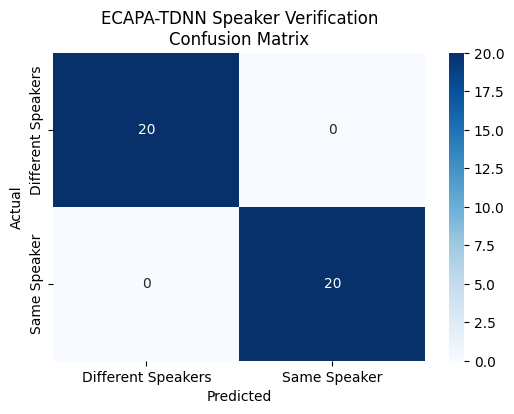


Classification Report:
                    precision    recall  f1-score   support

Different Speakers       1.00      1.00      1.00        20
      Same Speaker       1.00      1.00      1.00        20

          accuracy                           1.00        40
         macro avg       1.00      1.00      1.00        40
      weighted avg       1.00      1.00      1.00        40



In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using optimal threshold
test_pred = (test_scores > optimal_threshold).astype(int)

# Create confusion matrix
cm = confusion_matrix(test_labels, test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Different Speakers', 'Same Speaker'],
            yticklabels=['Different Speakers', 'Same Speaker'])
plt.title('ECAPA-TDNN Speaker Verification\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(test_labels, test_pred,
                           target_names=['Different Speakers', 'Same Speaker']))

In [39]:
print("Processing audio pairs and extracting embeddings...")
features = []
labels = []

for _, pair in df.iterrows():
    # Load both audio files
    audio1 = load_audio(pair['audio_path_1'])
    audio2 = load_audio(pair['audio_path_2'])

    # Extract embeddings
    emb1 = extract_embedding1(audio1)
    emb2 = extract_embedding1(audio2)


    # Normalize embeddings
    emb1_norm = emb1 / np.linalg.norm(emb1)
    emb2_norm = emb2 / np.linalg.norm(emb2)

    features.append(np.abs(emb1_norm - emb2_norm))
    labels.append(pair['label'])

# Convert to numpy arrays
X1 = np.array(features)
y1 = np.array(labels)


Processing audio pairs and extracting embeddings...


In [40]:
X1.shape

(200, 192)

In [41]:
y1.shape

(200,)

(160, 192) (40, 192) (160,) (40,)
Classification Report:
                    precision    recall  f1-score   support

Different Speakers       0.95      1.00      0.98        20
      Same Speaker       1.00      0.95      0.97        20

          accuracy                           0.97        40
         macro avg       0.98      0.97      0.97        40
      weighted avg       0.98      0.97      0.97        40



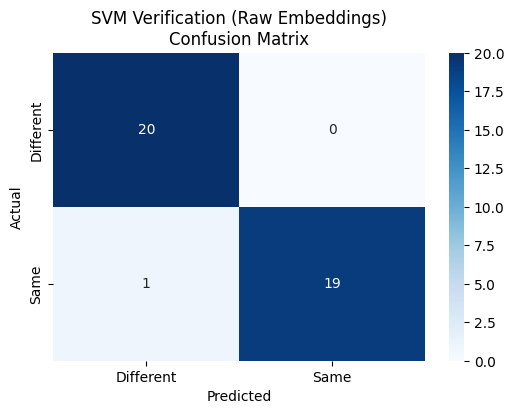

In [42]:
# perfomr SVM
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 3. Train-test split (speaker-independent)
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1,
    test_size=0.2,
    random_state=42,
    stratify=y1
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 4. Create SVM pipeline with feature scaling
model = make_pipeline(
    SVC(
        kernel='linear',
        C=1.0,
        gamma='scale',
        probability=True,
        random_state=42
    )
)

# 5. Train SVM
model.fit(X_train, y_train)

# 6. Evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred,
                          target_names=['Different Speakers', 'Same Speaker']))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Different', 'Same'],
            yticklabels=['Different', 'Same'])
plt.title('SVM Verification (Raw Embeddings)\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
# Verification Function
def verify_speakers(audio_path1, audio_path2, model):
    # Load and embed both audios
    audio1 = load_audio(audio_path1)
    audio2 = load_audio(audio_path2)

    emb1 = extract_embedding1(audio1)
    emb2 = extract_embedding1(audio2)

    # Normalize
    emb1_norm = emb1 / (np.linalg.norm(emb1) + 1e-10)
    emb2_norm = emb2 / (np.linalg.norm(emb2) + 1e-10)

    # Create feature (absolute difference)
    feat = np.abs(emb1_norm - emb2_norm).reshape(1, -1)

    # Predict using the pipeline (includes scaling)
    pred = model.predict(feat)[0]
    prob = model.predict_proba(feat)[0][1]  # probability of same speaker (label 1)

    return pred, prob


# Replace with your actual file paths
audio_path1 = "/content/LibriSpeech/train-clean-100/2196/170379/2196-170379-0000.flac"
audio_path2 = "/content/LibriSpeech/train-clean-100/2196/174172/2196-174172-0004.flac"

# Make sure the `model` variable is your trained SVM pipeline
# model = make_pipeline(StandardScaler(), SVC(...))  # already trained earlier

pred, prob = verify_speakers(audio_path1, audio_path2, model)

if pred == 1:
    print(f"Same speaker (confidence: {prob:.2f})")
else:
    print(f"Different speakers (confidence: {prob:.2f})")


Same speaker (confidence: 1.00)


## **speaker identity with a PCA**

In [ ]:
# from speechbrain.inference.speaker import SpeakerRecognition
# import torchaudio
# verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="./pretrained_ecapa")
signal, fs = torchaudio.load('/content/LibriSpeech/train-clean-100/1034/121119/1034-121119-0000.flac')
embedding = verification.encode_batch(signal)
embedding.shape

torch.Size([1, 1, 192])

In [ ]:
utterances = glob("/content/LibriSpeech/train-clean-100/**/*.flac", recursive=True)
np.random.shuffle(utterances)
utterances = utterances[:20]

from pathlib import Path

embeddings = []
labels = []
for u in utterances:
    tmp, fs = torchaudio.load(u)
    e = verification.encode_batch(tmp)
    embeddings.append(e[0, 0].numpy())
    spk_label = Path(u).parent.parent.stem
    labels.append(spk_label)

In [ ]:
from sklearn.decomposition import PCA

embeddings = np.array(embeddings)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

Text(0, 0.5, 'Principal Component 2')

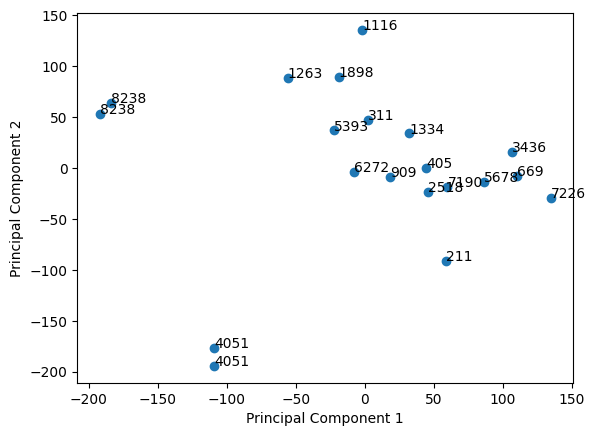

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(principalComponents[:, 0], principalComponents[:, 1])

for i, spkid in enumerate(labels):
    ax.annotate(spkid, (principalComponents[i, 0], principalComponents[i, 1]))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

## Speech verification Using CNN

Starting training...
Epoch 01 | Loss: 0.3993 | Acc: 62.50%
Epoch 02 | Loss: 0.3458 | Acc: 73.00%
Epoch 03 | Loss: 0.3166 | Acc: 72.00%
Epoch 04 | Loss: 0.3164 | Acc: 71.50%
Epoch 05 | Loss: 0.2414 | Acc: 70.50%
Epoch 06 | Loss: 0.2143 | Acc: 76.00%
Epoch 07 | Loss: 0.2192 | Acc: 79.50%
Epoch 08 | Loss: 0.2135 | Acc: 82.50%
Epoch 09 | Loss: 0.1796 | Acc: 82.00%
Epoch 10 | Loss: 0.1486 | Acc: 81.50%

Evaluating on validation set...

Evaluation Results:
Accuracy: 81.00%
ROC AUC: 0.9342
EER: 12.00%


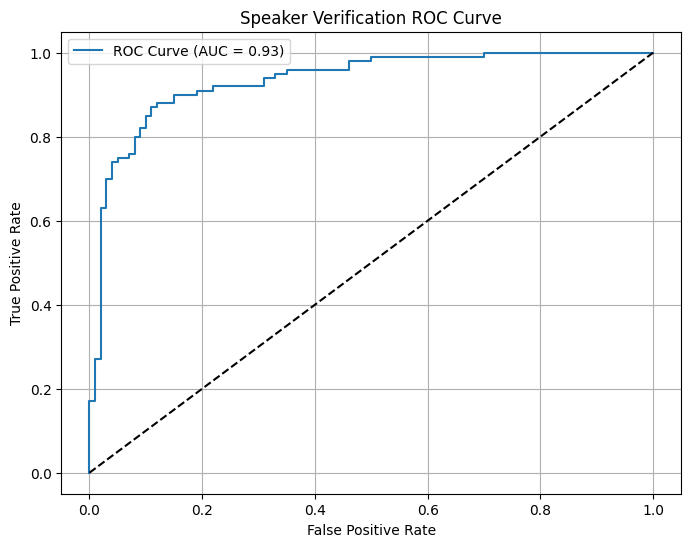

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import librosa
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from pathlib import Path


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model
class CNNEmbeddingNet(nn.Module):
    def __init__(self, n_mfcc=40):
        super().__init__()
        # Input shape: [batch, 1, n_mfcc, time]
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(3, 5), stride=(1, 2)),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, kernel_size=(3, 5), stride=(1, 2)),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=(3, 5), stride=(1, 2)),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=(3, 5), stride=(1, 2)),
            nn.ReLU(),
            nn.BatchNorm2d(128)
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        # x shape: [batch, 1, n_mfcc, time]
        x = self.cnn(x)
        x = self.pool(x).squeeze(-1).squeeze(-1)  # [batch, 128]
        return F.normalize(x, p=2, dim=1)

# AUDIO PROCESSING WITH LIBROSA
def extract_mfcc(waveform, sample_rate=16000, n_mfcc=40, duration=3.0):
    hop_length = 160  # 10ms frames
    expected_frames = int(duration * sample_rate / hop_length)

    mfcc = librosa.feature.mfcc(
        y=waveform,
        sr=sample_rate,
        n_mfcc=n_mfcc,
        n_fft=400,
        hop_length=hop_length,
        n_mels=64
    )

    # Pad/truncate to expected length
    if mfcc.shape[1] < expected_frames:
        pad_len = expected_frames - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_len)), mode='constant')
    else:
        mfcc = mfcc[:, :expected_frames]

    return mfcc

# Audio Processing
def load_audio_librosa(path, sample_rate=16000, duration=3.0):
    # Load with librosa (automatically resamples)
    waveform, sr = librosa.load(
        path,
        sr=sample_rate,
        duration=duration,
        res_type='kaiser_fast'
    )

    # Pad if shorter than duration
    if len(waveform) < int(sample_rate * duration):
        pad_len = int(sample_rate * duration) - len(waveform)
        waveform = np.pad(waveform, (0, pad_len), mode='constant')

    return waveform

# DataFrame
class AudioPairDataset(Dataset):
    def __init__(self, df, n_mfcc=40):
        self.df = df
        self.n_mfcc = n_mfcc

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # Load and process both audios
        waveform1 = load_audio_librosa(row['audio_path_1'])
        waveform2 = load_audio_librosa(row['audio_path_2'])

        mfcc1 = extract_mfcc(waveform1, n_mfcc=self.n_mfcc)
        mfcc2 = extract_mfcc(waveform2, n_mfcc=self.n_mfcc)

        # Convert to tensor and add channel dimension [1, n_mfcc, time]
        mfcc1 = torch.FloatTensor(mfcc1).unsqueeze(0)  # Now [1, n_mfcc, time]
        mfcc2 = torch.FloatTensor(mfcc2).unsqueeze(0)

        label = torch.tensor(row['label'], dtype=torch.float32)
        return mfcc1, mfcc2, label

# keep dimension as required
def collate_fn(batch):
    # Stack all mfcc1, mfcc2 separately
    mfcc1 = torch.stack([item[0] for item in batch])  # [batch, 1, n_mfcc, time]
    mfcc2 = torch.stack([item[1] for item in batch])
    labels = torch.stack([item[2] for item in batch])
    return mfcc1, mfcc2, labels

# LOSS
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super().__init__()
        self.margin = margin

    def forward(self, emb1, emb2, label):
        d = F.pairwise_distance(emb1, emb2)
        loss = label * d.pow(2) + (1 - label) * F.relu(self.margin - d).pow(2)
        return loss.mean()

# TRAINING LOOP
def train(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for mfcc1, mfcc2, label in loader:
        # Move to device
        mfcc1 = mfcc1.to(device)
        mfcc2 = mfcc2.to(device)
        label = label.to(device)

        # Forward pass
        emb1 = model(mfcc1)
        emb2 = model(mfcc2)

        # Compute loss
        loss = criterion(emb1, emb2, label)

        # Calculate accuracy
        with torch.no_grad():
            dist = F.pairwise_distance(emb1, emb2)
            pred = (dist < 0.5).float()
            correct += (pred == label).sum().item()
            total += label.size(0)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader), correct / total

# EVALUATION
def evaluate(model, df, device, n_mfcc=40):
    model.eval()
    cosine_scores, labels = [], []

    dataset = AudioPairDataset(df, n_mfcc=n_mfcc)
    loader = DataLoader(dataset, batch_size=32, collate_fn=collate_fn)

    with torch.no_grad():
        for mfcc1, mfcc2, label in loader:
            mfcc1, mfcc2 = mfcc1.to(device), mfcc2.to(device)

            emb1 = model(mfcc1)
            emb2 = model(mfcc2)

            # Compute cosine similarity
            cos_sim = F.cosine_similarity(emb1, emb2)

            cosine_scores.extend(cos_sim.cpu().numpy())
            labels.extend(label.cpu().numpy())

    # Calculate metrics
    cosine_scores = np.array(cosine_scores)
    labels = np.array(labels)

    pred = (cosine_scores > 0.5).astype(int)
    acc = accuracy_score(labels, pred)
    roc_auc = roc_auc_score(labels, cosine_scores)

    fpr, tpr, _ = roc_curve(labels, cosine_scores)
    eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]

    print(f"\nEvaluation Results:")
    print(f"Accuracy: {acc:.2%}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"EER: {eer:.2%}")

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Speaker Verification ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

# MAIN FUNCTION
def main(df, n_mfcc=40):
    # Initialize components
    model = CNNEmbeddingNet(n_mfcc=n_mfcc).to(device)
    dataset = AudioPairDataset(df, n_mfcc=n_mfcc)
    loader = DataLoader(dataset, batch_size=32, shuffle=True,
                      collate_fn=collate_fn, num_workers=4)

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = ContrastiveLoss()

    # Training loop
    print("Starting training...")
    for epoch in range(1, 11):
        loss, acc = train(model, loader, optimizer, criterion, device)
        print(f"Epoch {epoch:02d} | Loss: {loss:.4f} | Acc: {acc:.2%}")

    # Evaluation
    print("\nEvaluating on validation set...")
    evaluate(model, df, device, n_mfcc=n_mfcc)

main(df, n_mfcc=40)